# task 1

Take stock price of any company and predicts its price by using LSTM.

yahoo finance as data source

In [63]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

See the yahoo finance ticker for your stock symbol

In [65]:
stock_symbol = 'GAIL.NS'

last 5 years data with interval of 1 day

In [4]:
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-25,113.900002,114.966667,112.750000,113.733330,90.405800,12671994
2018-06-26,113.733330,115.150002,113.150002,113.916664,90.551537,14068107
2018-06-27,113.800003,113.916664,107.666664,109.599998,87.120255,13331112
2018-06-28,108.800003,108.800003,105.183334,106.516663,84.669334,19549908
2018-06-29,106.883331,116.266663,106.883331,113.416664,90.154091,22779048


In [7]:
len(data)

1235

In [9]:
data.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-19,107.849998,108.400002,106.699997,108.000000,108.000000,4126281
2023-06-20,107.900002,108.699997,106.750000,108.250000,108.250000,11218628
2023-06-21,108.250000,108.400002,106.500000,106.699997,106.699997,13138208
2023-06-22,106.699997,107.000000,104.000000,104.449997,104.449997,16244574
2023-06-23,104.349998,105.400002,103.300003,105.050003,105.050003,7880417


In [10]:
opn = data[['Open']]

<AxesSubplot:xlabel='Date'>

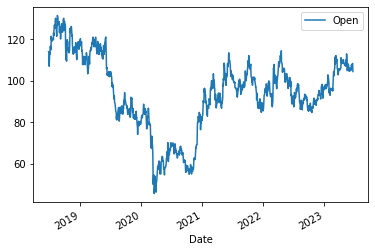

In [11]:
opn.plot()

In [12]:
import matplotlib.pyplot as plt

In [13]:
ds = opn.values

In [14]:
ds

array([[113.90000153],
       [113.73332977],
       [113.80000305],
       ...,
       [108.25      ],
       [106.69999695],
       [104.34999847]])

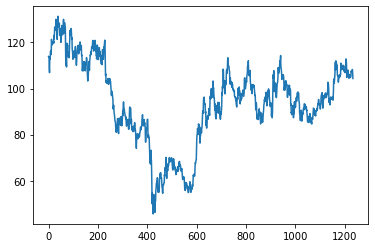

In [15]:
plt.plot(ds)

In [16]:
import numpy as np

In [17]:
from sklearn.preprocessing import MinMaxScaler

Using MinMaxScaler for normalizing data between 0 & 1

In [18]:
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [19]:
len(ds_scaled), len(ds)

(1235, 1235)

Defining test and train data sizes

In [20]:
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [21]:
train_size,test_size

(864, 371)

Splitting data between train and test

In [22]:
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [23]:
len(ds_train),len(ds_test)

(864, 371)

creating dataset in time series for LSTM model 
X[100,120,140,160,180] : Y[200]

In [24]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

Taking 100 days price as one record for training

In [25]:
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [26]:
X_train.shape,y_train.shape

((763, 100), (763,))

In [27]:
X_test.shape, y_test.shape

((270, 100), (270,))

Reshaping data to fit into LSTM model

In [28]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

Creating LSTM model using keras

In [30]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Training model with adam optimizer and mean squared error loss function

In [31]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 [==============================] - 13s 330ms/step - loss: 0.0820 - val_loss: 0.0105
Epoch 2/100
12/12 [==============================] - 2s 211ms/step - loss: 0.0132 - val_loss: 0.0056
Epoch 3/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0083 - val_loss: 0.0057
Epoch 4/100
12/12 [==============================] - 3s 247ms/step - loss: 0.0057 - val_loss: 0.0021
Epoch 5/100
12/12 [==============================] - 3s 253ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 6/100
12/12 [==============================] - 3s 247ms/step - loss: 0.0044 - val_loss: 0.0021
Epoch 7/100
12/12 [==============================] - 3s 252ms/step - loss: 0.0043 - val_loss: 0.0020
Epoch 8/100
12/12 [==============================] - 3s 253ms/step - loss: 0.0041 - val_loss: 0.0021
Epoch 9/100
12/12 [==============================] - 3s 247ms/step - loss: 0.0039 - val_loss: 0.0019
Epoch 10/100
12/12 [==============================] - 3s 255ms/step - loss: 0.0038 - val_l

PLotting loss, it shows that loss has decreased significantly and model trained well

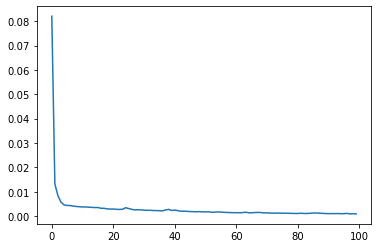

In [32]:
loss = model.history.history['loss']
plt.plot(loss)

Predicitng on train and test data

In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 51ms/step


Inverse transform to get actual value

In [34]:
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

Comparing using visuals

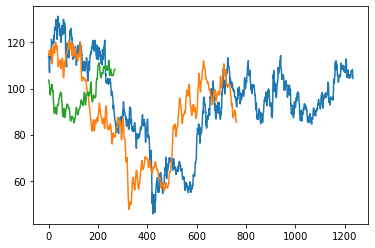

In [35]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [36]:
type(train_predict)

numpy.ndarray

In [37]:
test = np.vstack((train_predict,test_predict))

Combining the predited data to create uniform data visualization

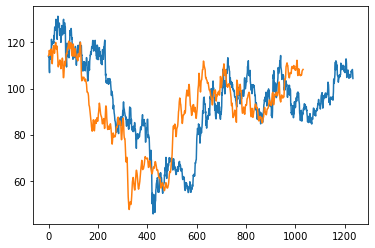

In [38]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [39]:
len(ds_test)

371

Getting the last 100 days records

In [40]:
fut_inp = ds_test[270:]

In [41]:
fut_inp = fut_inp.reshape(1,-1)

In [42]:
tmp_inp = list(fut_inp)

In [43]:
fut_inp.shape

(1, 101)

Creating list of the last 100 data

In [44]:
tmp_inp = tmp_inp[0].tolist()

Predicting next 30 days price suing the current data
It will predict in sliding window manner (algorithm) with stride 1

In [45]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.7073231935501099], [0.7014837861061096], [0.701931357383728], [0.7047320008277893], [0.708564281463623], [0.7129302620887756], [0.7174899578094482], [0.7219576835632324], [0.726116418838501], [0.7298322916030884], [0.7330526113510132], [0.7357937097549438], [0.73812335729599], [0.740140438079834], [0.7419571280479431], [0.743681788444519], [0.7454079985618591], [0.7472068071365356], [0.7491236329078674], [0.7511793971061707], [0.7533724904060364], [0.7556859254837036], [0.7580905556678772], [0.7605522871017456], [0.7630363702774048], [0.7655118703842163], [0.767953097820282], [0.7703415751457214], [0.7726670503616333], [0.7749258279800415]]


In [46]:
len(ds_scaled)

1235

Creating a dummy plane to plot graph one after another

In [47]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

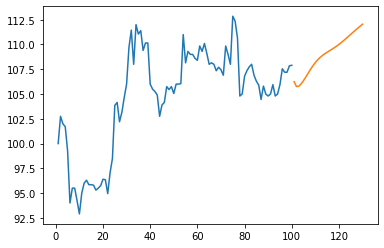

In [50]:
plt.plot(plot_new[:100], normalizer.inverse_transform(ds_scaled[1132:])[:100])
plt.plot(plot_pred[:100], normalizer.inverse_transform(lst_output)[:100])

In [51]:
ds_new = ds_scaled.tolist()

In [52]:
len(ds_new)

1235

Entends helps us to fill the missing value with approx va

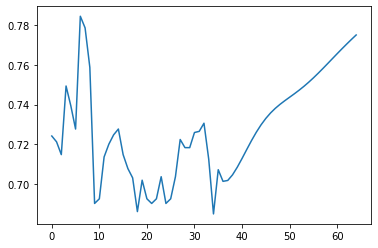

In [53]:
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

Creating final data for plotting

In [54]:
final_graph = normalizer.inverse_transform(ds_new).tolist()

Plotting final results with predicted value after 30 Days

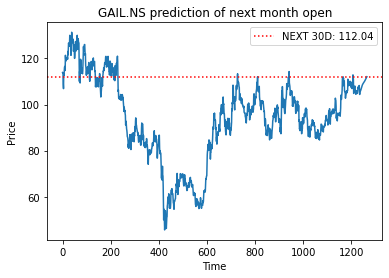

In [55]:
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()